### project 3 (Data Visualization)

## Communicate Data findings
### Prosper Loan Data 
 

  
## Table of Contents
- [Introduction](#intro)
- [Part I - Exploreing the Data](#explore)
- [Univariate](#uni)
- [Bivariate ](#bi)
- [multivariate](#multi)


<a id='intro'></a>
### Introduction
In this project, we will discuss the dataset `Prosper Loan Data.csv` This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

We will discover in this project the variables of importance for us in order to answer our question.
These variables are:

`ListingNumber`:The number that uniquely identifies the listing to the public as displayed on the website.

`CreditGrade`:The Credit rating that was assigned at the time the listing went live. Applicable for listings pre-2009 period and will only be populated for those listings.

`Term`:The length of the loan expressed in months.

`LoanStatus`:The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.

`BorrowerAPR`:The Borrower's Annual Percentage Rate (APR) for the loan.

`ProsperRating (Alpha)`:The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.

`ProsperScore`:A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.
<a id='here'></a>

`ListingCategory`:The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

`EmploymentStatusDuration`:The length in months of the employment status at the time the listing was created.

`IncomeRange`:The income range of the borrower at the time the listing was created.

`LoanOriginalAmount`:The origination amount of the loan.

`PercentFunded`:Percent the listing was funded.

`Investors`:The number of investors that funded the loan.


first: import libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

### Data Wrangling 
`1.` Now let's get the data from `prosperLoanData.csv`:

In [2]:
df= pd.read_csv('prosperLoanData.csv')
print (df.shape)
df.head()

(113937, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


`2.` make a new data frame `loan` with only columns of interest:

In [3]:
loan= df[['ListingNumber','CreditGrade','Term','LoanStatus','BorrowerAPR','ProsperRating (Alpha)','ProsperScore','ListingCategory (numeric)','EmploymentStatusDuration','IncomeRange','LoanOriginalAmount','PercentFunded','Investors']]
print (loan.shape)
loan.head()

(113937, 13)


,ListingNumber,CreditGrade,Term,LoanStatus,BorrowerAPR,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,IncomeRange,LoanOriginalAmount,PercentFunded,Investors
0,193129,C,36,Completed,0.16516,NaN,NaN,0,2.0,"$25,000-49,999",9425,1.0,258
1,1209647,NaN,36,Current,0.12016,A,7.0,2,44.0,"$50,000-74,999",10000,1.0,1
2,81716,HR,36,Completed,0.28269,NaN,NaN,0,NaN,Not displayed,3001,1.0,41
3,658116,NaN,36,Current,0.12528,A,9.0,16,113.0,"$25,000-49,999",10000,1.0,158
4,909464,NaN,36,Current,0.24614,D,4.0,2,44.0,"$100,000+",15000,1.0,20


`3.` removing the duplicated rows:

In [4]:
#find if there are any duplicated rows
loan.duplicated().sum()
#there is no duplication

0

`4.` insure correct data type:

In [5]:
loan.describe()

,ListingNumber,Term,BorrowerAPR,ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,LoanOriginalAmount,PercentFunded,Investors
count,1.139370e+05,113937.000000,113912.000000,84853.000000,113937.000000,106312.000000,113937.00000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,5.950067,2.774209,96.071582,8337.01385,0.998584,80.475228
std,3.280762e+05,10.436212,0.080364,2.376501,3.996797,94.480605,6245.80058,0.017919,103.239020
min,4.000000e+00,12.000000,0.006530,1.000000,0.000000,0.000000,1000.00000,0.700000,1.000000
25%,4.009190e+05,36.000000,0.156290,4.000000,1.000000,26.000000,4000.00000,1.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,6.000000,1.000000,67.000000,6500.00000,1.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,8.000000,3.000000,137.000000,12000.00000,1.000000,115.000000
max,1.255725e+06,60.000000,0.512290,11.000000,20.000000,755.000000,35000.00000,1.012500,1189.000000


`4.1` change data type for `ListingCategory(numeric)` from numeric to equavilint string from [Here](#here)

In [6]:
ListingCategory=['Not Available',' Debt Consolidation','Home Improvement','Business','Personal Loan','Student Use','Auto','Other','Baby&Adoption','Boat','Cosmetic Procedure','Engagement Ring','Green Loans','Household Expenses','Large Purchases','Medical/Dental','Motorcycle','RV','Taxes','Vacation','Wedding Loans']
loan['ListingCategory (numeric)']=loan['ListingCategory (numeric)'].apply(lambda x: ListingCategory[x])
loan.columns = ['ListingCategory' if x=='ListingCategory (numeric)' else x for x in loan.columns]

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


`4.2` set the column `IncomeRange`as ordinary categorical variable:

In [7]:
loan['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [8]:
IncomeRange=['$100,000+','$75,000-99,999','$50,000-74,999','$25,000-49,999','$1-24,999','$0','Not displayed','Not employed']
IncomeC= pd.api.types.CategoricalDtype(ordered=True, categories=IncomeRange)
loan['IncomeRange']= loan['IncomeRange'].astype(IncomeC)

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


`4.3`  set the column `CreditGrade` and `ProsperRating (Alpha)`as ordinary categorical variable:

In [9]:
credit_class=['AA','A','B','C','D','E','HR','NC']
c_class= pd.api.types.CategoricalDtype(ordered=True, categories=credit_class)
loan['CreditGrade']= loan['CreditGrade'].astype(c_class)
loan['ProsperRating (Alpha)']=loan['ProsperRating (Alpha)'].astype(c_class)

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


 <a id='explore'></a>
### Explore the data:
to answer this questions: 
<a id='Uni'></a>
### univariant:

a.[what is the most common staus of loan included in this dataset?](#a)

b.[what is the most common reasons for people to apply for a loan?](#b)

c.[what is the most common term for a loan?](#c)


`a.` what is the most `LoanStatus` included in this dataset?<a id='a'></a>

In [10]:
loan['LoanStatus']=loan['LoanStatus'].apply(lambda x:x.split()[0]);
status= loan['LoanStatus'].value_counts();

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


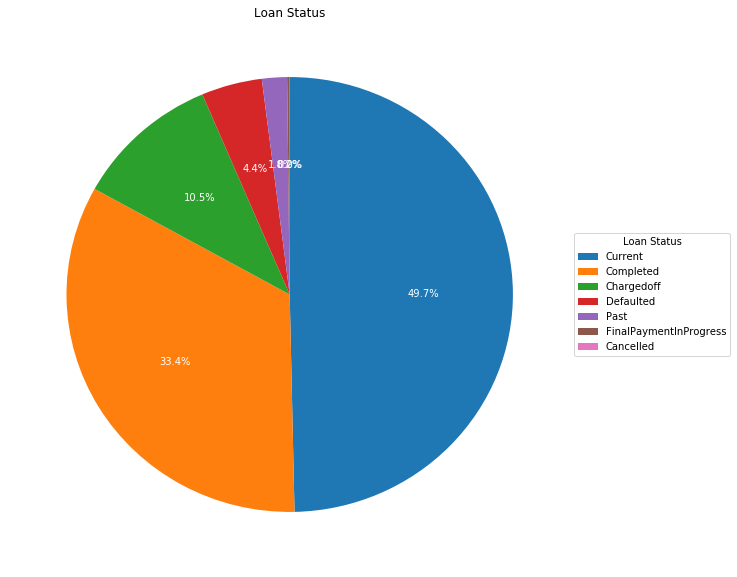

In [11]:

fig, ax = plt.subplots(figsize=(10, 10))

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct, absolute)


wedges, texts, autotexts = ax.pie(status, autopct=lambda pct: func(pct, status),
                                  textprops=dict(color="w"),startangle=90,counterclock=False)

ax.legend(wedges, status.index,
          title="Loan Status",
          loc="center left",
          bbox_to_anchor=(1, 0, 5, 1))

ax.set_title("Loan Status");



#### Answer: About half of this data set is for people with Current Loans.

<a id='b'></a>`b.` lets invistigate what is the most loan porpose `ListingCategory`

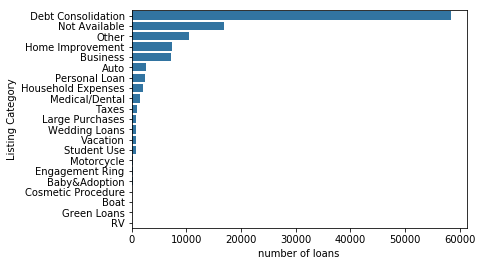

In [12]:
color= sb.color_palette()[0]
order= loan['ListingCategory'].value_counts().index

sb.countplot(data=loan, y='ListingCategory', order=order, color=color);
plt.xlabel('number of loans'), plt.ylabel('Listing Category');



### Answer: The most commmen reason for taking loans is Debet Consolidation and Baby&Adaption

`c.`what is the most common loan `Term` <a id='c'></a>`

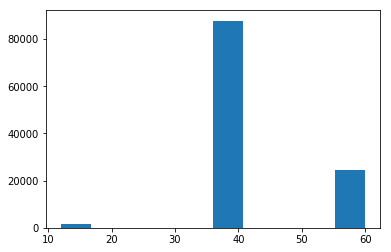

In [13]:
plt.hist(data=loan, x='Term', color =color);

### Answer: The most commmen term for a loan is 36 months 

<a id='bi'></a>
### bivariant:

d.[which Term bring more investors?](#d)

e.[Do Investors tend more to "less risk"investment?](#e)

f.[Is being from better CreditGrade make it more possible to get higher loan?](#f)

g.[What is the relationship between ProsperRating and the LoanOriginalAmount?](#g)

h. [Are the employers more likely to get more loans in their first years in the job?](#h)

i.[Do people with higher Income tend to get higher loans?](#i)

j. [Does Loan Amount have any relation with BorrowerAPR?](#j)

<a id=''></a>a.`  and what of them get more loan amount `LoanOriginalAmount`:

<a id='d'></a>`d.` lets investigate the relationship between `Term` and `Investors` columns:

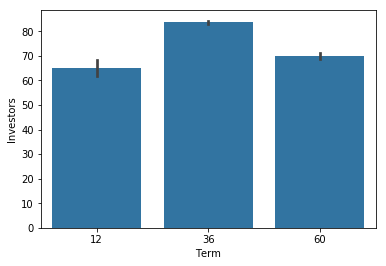

In [14]:
sb.barplot(data=loan ,x='Term',y='Investors', color=color);

#### Answer: The 36 Term investment is the most attractive for the Investors.

`e.` The relationship between the number of investors / Loan Amount and the Risk "prosper score'? <a id='e'></a>

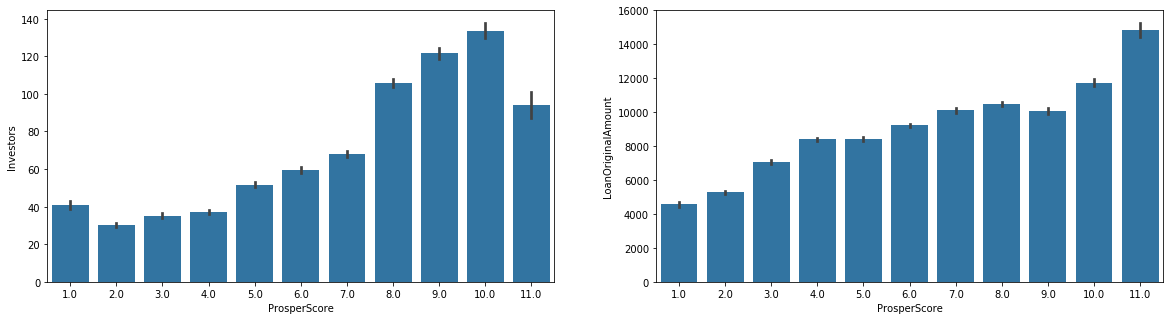

In [15]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sb.barplot(data=loan ,x='ProsperScore',y='Investors', color=color);
plt.subplot(1,2,2)
sb.barplot(data=loan ,x='ProsperScore',y='LoanOriginalAmount', color=color);

#### Answer: The lower the activity is risk more investors being interest

`f.` `g.` find if `CreditGrade` and `prosperRating (Alpha)` related to the `LoanOriginalAmount`:<a id='g'></a><a id='f'></a>

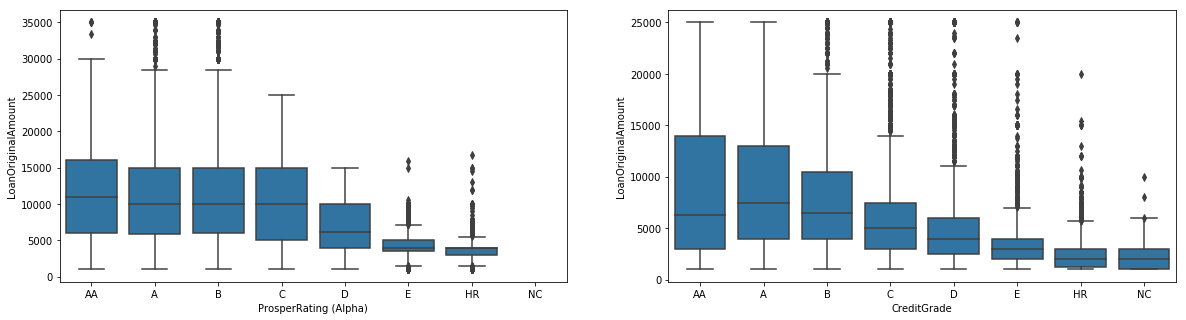

In [16]:
plt.figure(figsize=[20,5]);
plt.subplot(1,2,1);
sb.boxplot(data=loan,x='ProsperRating (Alpha)',y='LoanOriginalAmount',color=color);
plt.subplot(1,2,2);
sb.boxplot(data=loan,x='CreditGrade',y='LoanOriginalAmount',color=color);

#### Answer: people with better Credit Grade tend to get more Loan Amount.

`h.` Are the employers more likely to get more loans in their first years in the job?<a id='h'></a>

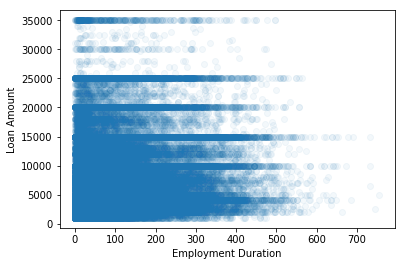

In [17]:
plt.scatter(data=loan ,y='LoanOriginalAmount',x='EmploymentStatusDuration', color=color,alpha=1/20);
plt.xlabel('Employment Duration');
plt.ylabel('Loan Amount');

#### Answer: people tend to take more Loans with higher amount at first  years of their Employment.

`i.` Do people with higher Income tend to get higher loans?<a id='i'></a>

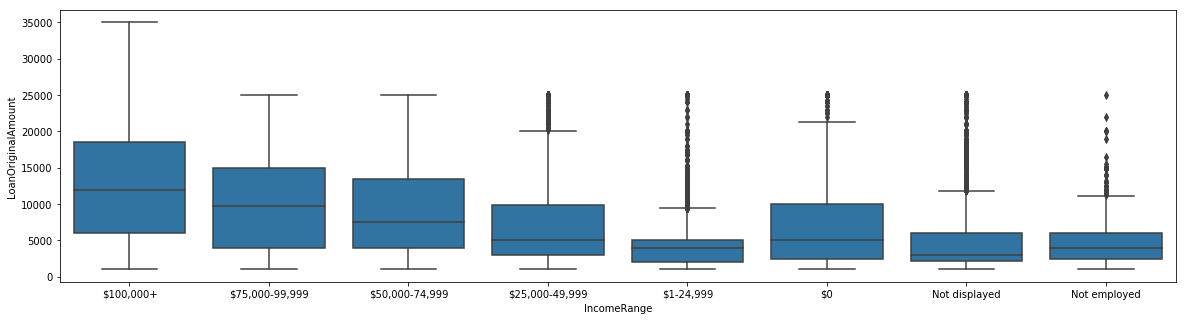

In [18]:
plt.figure(figsize=[20,5])
sb.boxplot(data=loan,x='IncomeRange',y='LoanOriginalAmount',color=color)


#### Answer: having higher Income make it more common to get higher loans.

`j.` Does Loan Amount have any relation with `BorrowerAPR`?<a id='j'></a>

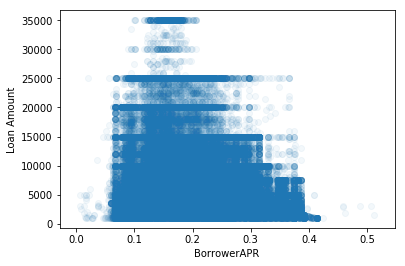

In [19]:
plt.scatter(data=loan ,y='LoanOriginalAmount',x='BorrowerAPR', color=color,alpha=1/20);
plt.xlabel('BorrowerAPR');
plt.ylabel('Loan Amount');

#### Answer: people with about 1.5 BorrowerAPR have the highest Loan Amount.

<a id='multi'></a>
### multivariant:
k. [what is the relation between the loan amount and Borrower APR in each Term?](#k)

l.[Does the Loan Amount relation with Emoployment Status the same for every CreditGrade?](#l)

m. [Does Loan Amount have any relation with BorrowerAPR?](#m)


`k.` what is the relation between the loan amount and Borrower APR in each Term? <a id='k'></a>

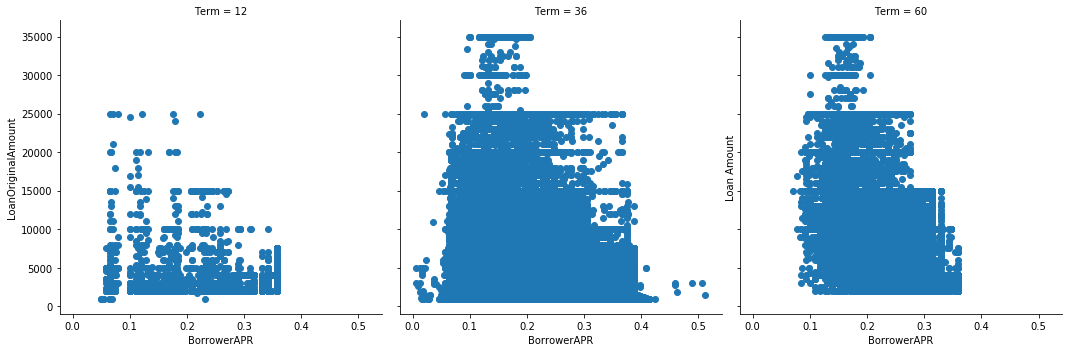

In [20]:
g = sb.FacetGrid(data = loan, col = 'Term', size = 5);
g.map(plt.scatter,'BorrowerAPR', 'LoanOriginalAmount');


plt.xlabel('BorrowerAPR');
plt.ylabel('Loan Amount');


### Answer : ans the loanTerm get longer Loan Amount get higher and BorrowerAPR get close to (0.1 : 0.2)

`l.` Does the Loan Amount relation with Emoployment Status the same for every CreditGrade? <a id='l'></a>

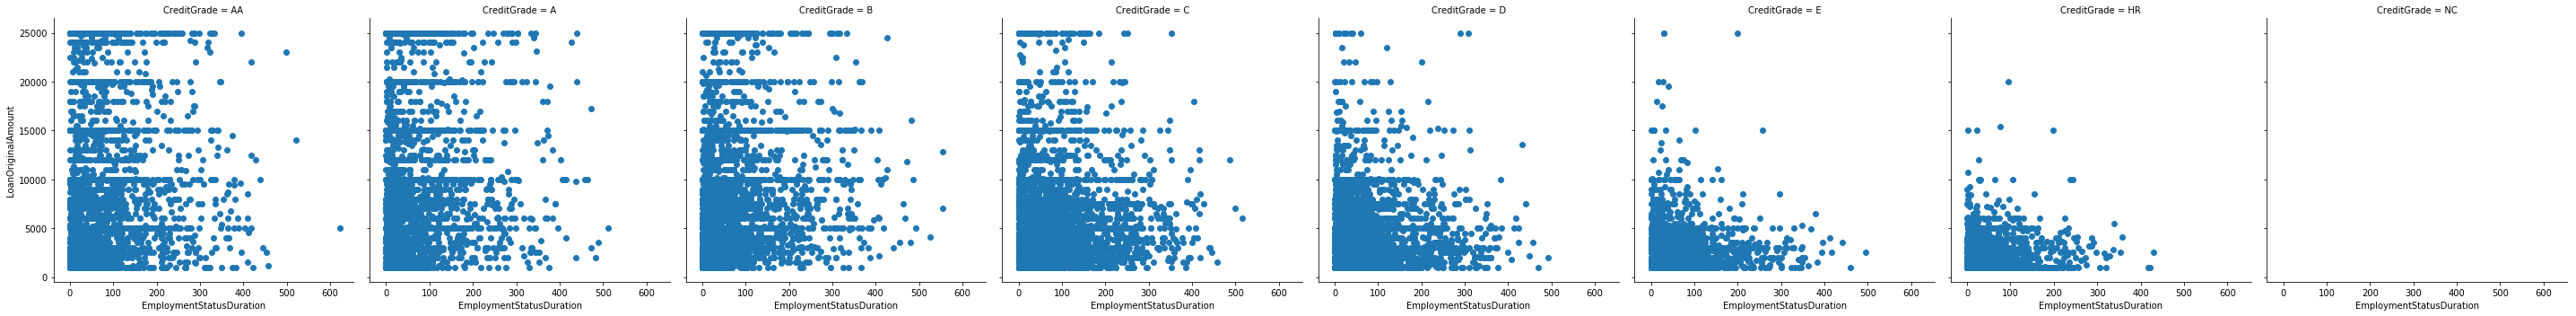

In [21]:
g = sb.FacetGrid(data = loan, col = 'CreditGrade', size = 5);
g.map(plt.scatter,'EmploymentStatusDuration', 'LoanOriginalAmount');

### Answer: Yes it does , the better the Credit Grade is the higher loan amount and Duration.

`m.` Does Prosper score (Risk) effect the Loan Amount and investors ? <a id='m'></a>

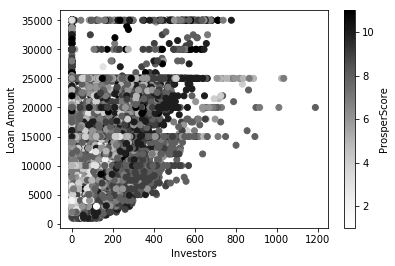

In [22]:
plt.scatter(data = loan, x = 'Investors', y = 'LoanOriginalAmount', c = 'ProsperScore',
            cmap = 'Greys')
colorbar=plt.colorbar()
colorbar.set_label('ProsperScore')

plt.xlabel('Investors');
plt.ylabel('Loan Amount');

### Answer: Yes, lower Risk get more investors and loan amount